# User Overview Analysis

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Utitlity Functions

In [86]:
def convert_to_string(df, columns):
    for col in columns:
        df[col] = df[col].astype("string")

def convert_to_numbers(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col])

def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col])

def multiply_by_factor(df, columns, factor):
    for col in columns:
        df[col] = df[col] * factor

In [3]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing_values(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

def percent_missing_rows(df):

    # Calculate total number rows with missing values
    missing_rows = sum([True for idx,row in df.iterrows() if any(row.isna())])

    # Calculate total number of rows
    total_rows = df.shape[0]

    # Calculate the percentage of missing rows
    print(round(((missing_rows/total_rows) * 100), 2), "%",
    "of the rows in the dataset contain atleast one missing value.")

In [4]:
# Function to calculate missing values by column
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()



    # Percentage of missing values
    mis_val_percent = 100 * mis_val / len(df)

    # dtype of missing values
    mis_val_dtype = df.dtypes

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_dtype], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'Dtype'})

    # Sort the table by percentage of missing descending and remove columns with no missing values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,0] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    if mis_val_table_ren_columns.shape[0] == 0:
        return

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [5]:
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

def fix_missing_median(df, col):
    median = df[col].median()
    count = df[col].isna().sum()
    df[col] = df[col].fillna(median)
    print(f"{count} missing values in the column {col} have been replaced by its median value {median}.")
    return df[col]

def fix_missing_value(df, col, value):
    count = df[col].isna().sum()
    df[col] = df[col].fillna(value)
    if type(value) == 'str':
        print(f"{count} missing values in the column {col} have been replaced by '{value}'.")
    else:
        print(f"{count} missing values in the column {col} have been replaced by '{value}'.")



In [6]:
def drop_duplicates(df):
    old = df.shape[0]
    df.drop_duplicates(inplace=True)
    new = df.shape[0]
    count = old - new
    if (count == 0):
        print("No duplicate rows were found.")
    else:
        print(f"{count} duplicate rows were found and removed.")

def drop_rows_with_missing_values(df):
    old = df.shape[0]
    df.dropna(inplace=True)
    new = df.shape[0]
    count = old - new
    print(f"{count} rows containg missing values were dropped.")

def drop_columns(df, columns):
    df.drop(columns, axis=1, inplace=True)
    count = len(columns)
    if count == 1:
        print(f"{count} column was dropped.")
    else:
        print(f"{count} columns were dropped.")

In [148]:
def plotly_plot_pie(df, column, limit):
    a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()
    a = a.sort_values("count", ascending=False)
    a.loc[a['count'] < limit, column] = f'Other {column}s'
    fig = px.pie(a, values='count', names=column, title=f'Distribution of {column}s', width=800, height=500)
    fig.show()

def plotly_plot_hist(df, column, color=['cornflowerblue']):
    fig = px.histogram(
            df,
            x=column,
            marginal='box',
            color_discrete_sequence=color,
            title=f'Distribution of {column}')
    fig.update_layout(bargap=0.01)
    fig.show()

def plotly_plot_scatter(df, x_col, y_col, marker_size, hover=[]):
    fig = px.scatter(
            df,
            x=x_col,
            y=y_col,
            opacity=0.8,
            hover_data=hover,
            title=f'{x_col} vs. {y_col}')
    fig.update_traces(marker_size=marker_size)
    fig.show()

def plot_hist(df:pd.DataFrame, column:str, color:str='cornflowerblue')->None:
    sns.displot(data=df, x=column, color=color, kde=True, height=6, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col)
    plt.title(f'{x_col} Vs. {y_col}\n', size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

## Reading Data

In [8]:
# reading the csv file
missing_values = ["n/a", "na", "undefined"]
tellco_df = pd.read_csv("../data/Week1_challenge_data_source.csv", na_values=missing_values)
tellco_df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [9]:
# reading the field descriptions file
tellco_field_desc_df = pd.read_excel("../data/Field Descriptions.xlsx")
tellco_field_desc_df

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


## General Statistics

In [10]:
# number of elements in the df
tellco_df.size

8250055

In [11]:
# rows and columns in the df
tellco_df.shape

(150001, 55)

In [12]:
tellco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [13]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns, excluding NaN values
tellco_df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


It doesn't make sense to compute descriptive statistics for Beared Id, IMSI, MSISDN/Number and IMEI. But the describe method computes the statistics of all numeric columns. Another thing is these statisics are computed before the data is cleaned. So there might be changes after missing values and outliers are handled.

## Cleaning columns

In [14]:
tellco_df.shape

(150001, 55)

In [15]:
# number of rows in the description
len(tellco_field_desc_df)

56

There are 150001 rows and 55 columns in the dataframe. However, we have 56 columns with their names and descriptions in tellco_field_desc_df. This means there is one column that is described but not included in the dataframe.

In [16]:
comparison_df = pd.concat([ pd.Series(tellco_df.columns.tolist()), tellco_field_desc_df['Fields']], axis=1)
comparison_df.rename(columns={0: 'Column names in dataframe', 'Fields': 'Column names in description file'}, inplace=True)
comparison_df

,Column names in dataframe,Column names in description file
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


"Dur. (ms)" is skipped in the dataframe as seen at index 1 in comparison_df. This is where the order of columns began shifting. So starting from index 1 we will compare two consequtive rows for the same column. But the same column name "Dur. (ms)" appears in the dataframe at index 5 while the description file tells us it is "Dur. (s)" at index 6. Since both columns measurement differ as shown in their name, we need to check which one is right. To investigate this, we will use the "Dur. (ms).1" column which is found at index 28 and 29 in the dataframe and description file respectively.

In [17]:
tellco_df[['Dur. (ms)', 'Dur. (ms).1']]

,Dur. (ms),Dur. (ms).1
0,1823652.0,1.823653e+09
1,1365104.0,1.365104e+09
2,1361762.0,1.361763e+09
3,1321509.0,1.321510e+09
4,1089009.0,1.089009e+09
...,...,...
149996,81230.0,8.123076e+07
149997,97970.0,9.797070e+07
149998,98249.0,9.824953e+07
149999,97910.0,9.791063e+07


It seems that the "Dur. (ms)" column is measured in seconds. So we will rename it approprietly. Let's also rename some of the columns so that they are clear as their description and follow the naming style of other columns.

In [18]:
tellco_df.rename(columns={'Dur. (ms)': 'Dur (s)', 'Dur. (ms).1': 'Dur (ms)', 'Start ms': 'Start Offset (ms)', 'End ms': 'End Offset (ms)'}, inplace=True)
tellco_df.columns.tolist()

['Bearer Id',
 'Start',
 'Start Offset (ms)',
 'End',
 'End Offset (ms)',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 12

In [19]:
tellco_df.dtypes

Bearer Id                                   float64
Start                                        object
Start Offset (ms)                           float64
End                                          object
End Offset (ms)                             float64
Dur (s)                                     float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [20]:
tellco_df

,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


By observing the columns we can realize that "Start" and "End" columns are actually datetime values even though they are labelled  as objects by pandas. Besides these two cloumns all the other columns with object data types are actually string values. So we will convert these columns to their appropriate data types.

In [21]:
convert_to_datetime(tellco_df, ['Start', 'End'])

,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [22]:
# get the columns with object data type
string_columns = tellco_df.select_dtypes(include='object').columns.tolist()
string_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [23]:
convert_to_string(tellco_df, string_columns)

,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [24]:
tellco_df.dtypes

Bearer Id                                          float64
Start                                       datetime64[ns]
Start Offset (ms)                                  float64
End                                         datetime64[ns]
End Offset (ms)                                    float64
Dur (s)                                            float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  string
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

## Missing values

In [25]:
percent_missing_values(tellco_df)

The dataset contains 12.72 % missing values.


In [26]:
missing_df = missing_values_table(tellco_df)

Your selected dataframe has 55 columns.
There are 41 columns that have missing values.


In [27]:
missing_df

,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.84,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,float64
Nb of sec with 125000B < Vol DL,97538,65.02,float64
TCP UL Retrans. Vol (Bytes),96649,64.43,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88,float64
TCP DL Retrans. Vol (Bytes),88146,58.76,float64
HTTP UL (Bytes),81810,54.54,float64
HTTP DL (Bytes),81474,54.32,float64


As a convention, it is good to remove columns with more than 30% of missing values.

In [28]:
columns_to_be_removed = missing_df[missing_df['% of Total Values'] >= 30.00].index.tolist()
columns_to_be_removed

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [29]:
tellco_clean = tellco_df.drop(columns_to_be_removed, axis=1)
tellco_clean.shape

(150001, 45)

Now let's check the status of missing values in the modified dataframe.

In [30]:
percent_missing_values(tellco_clean)

The dataset contains 1.29 % missing values.


In [31]:
missing_values_table(tellco_clean)

Your selected dataframe has 45 columns.
There are 31 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Avg RTT DL (ms),27829,18.55,float64
Avg RTT UL (ms),27812,18.54,float64
Handset Type,9559,6.37,string
Handset Manufacturer,9559,6.37,string
Last Location Name,1153,0.77,string
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64


Avg RTT DL (ms) and Avg RTT UL (ms) have the highest number of missing values with around 18.5%. So we will impute them with the mean.

In [32]:
tellco_clean['Avg RTT DL (ms)'].skew(skipna=True)

62.90782807995961

In [33]:
tellco_clean['Avg RTT UL (ms)'].skew(skipna=True)

28.45741458546382

Since both the columns Avg RTT DL (ms) and Avg RTT UL (ms) are heavily positively skewed, it is advisable to impute them with their median instead of mean.

In [34]:
fix_missing_median(tellco_clean, 'Avg RTT DL (ms)')

27829 missing values in the column Avg RTT DL (ms) have been replaced by its median value 45.0.


0         42.0
1         65.0
2         45.0
3         45.0
4         45.0
          ... 
149996    32.0
149997    27.0
149998    43.0
149999    37.0
150000    45.0
Name: Avg RTT DL (ms), Length: 150001, dtype: float64

In [35]:
fix_missing_median(tellco_clean, 'Avg RTT UL (ms)')

27812 missing values in the column Avg RTT UL (ms) have been replaced by its median value 5.0.


0         5.0
1         5.0
2         5.0
3         5.0
4         5.0
         ... 
149996    0.0
149997    2.0
149998    6.0
149999    5.0
150000    5.0
Name: Avg RTT UL (ms), Length: 150001, dtype: float64

In [36]:
percent_missing_values(tellco_clean)

The dataset contains 0.46 % missing values.


In [37]:
percent_missing_rows(tellco_clean)

7.95 % of the rows in the dataset contain atleast one missing value.


In [38]:
missing_values_table(tellco_clean)

Your selected dataframe has 45 columns.
There are 29 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Handset Type,9559,6.37,string
Handset Manufacturer,9559,6.37,string
Last Location Name,1153,0.77,string
MSISDN/Number,1066,0.71,float64
Bearer Id,991,0.66,float64
Nb of sec with Vol UL < 1250B,793,0.53,float64
UL TP > 300 Kbps (%),792,0.53,float64
50 Kbps < UL TP < 300 Kbps (%),792,0.53,float64
10 Kbps < UL TP < 50 Kbps (%),792,0.53,float64
UL TP < 10 Kbps (%),792,0.53,float64


Since "Handset Type" and "Handset Manufacturer" are categorical columns, it is better to impute them with the value "unknown" so that we don't bias the data.

In [39]:
fix_missing_value(tellco_clean, 'Handset Type', 'unknown')
fix_missing_value(tellco_clean, 'Handset Manufacturer', 'unknown')

9559 missing values in the column Handset Type have been replaced by 'unknown'.
9559 missing values in the column Handset Manufacturer have been replaced by 'unknown'.


In [40]:
percent_missing_values(tellco_clean)

The dataset contains 0.18 % missing values.


In [41]:
percent_missing_rows(tellco_clean)

2.07 % of the rows in the dataset contain atleast one missing value.


Since only 2.07% of the rows contain atleast one missing value and the total number of rows is around 150000, dropping these rows won't have a noticable negative impact.

In [42]:
drop_rows_with_missing_values(tellco_clean)

3110 rows containg missing values were dropped.


In [43]:
percent_missing_values(tellco_clean)

The dataset contains 0.0 % missing values.


## Dropping duplicates

In [44]:
# search for duplicate rows and drop them
drop_duplicates(tellco_clean)

No duplicate rows were found.


As we have seen in the column cleaning section we have two duration columns one in seconds and the other in micro seconds. Let us check if the values are equal by converting the micro seconds to seconds.

In [45]:
temp_df = tellco_clean[['Dur (s)', 'Dur (ms)']].copy()
multiply_by_factor(temp_df, ['Dur (ms)'], 1/1000)
temp_df['comparison'] = (temp_df['Dur (s)'] == temp_df['Dur (ms)'].apply(math.floor))
temp_df

,Dur (s),Dur (ms),comparison
0,1823652.0,1823652.892,True
1,1365104.0,1365104.371,True
2,1361762.0,1361762.651,True
3,1321509.0,1321509.685,True
4,1089009.0,1089009.389,True
...,...,...,...
149995,59587.0,59587.792,True
149996,81230.0,81230.763,True
149997,97970.0,97970.704,True
149998,98249.0,98249.527,True


In [46]:
print(all(temp_df['comparison']))

True


This proves that when floored these two columns are the same. So we will keep "Dur (ms)" as it is more precise and drop "Dur (s)".

In [47]:
drop_columns(tellco_clean, ['Dur (s)'])

1 column was dropped.


## Deriving new columns

Even though we have separated upload and download data volumes for each application, having the sum of them as a total is necessary for insights.

In [49]:
tellco_clean['Social Media Data Volume (Bytes)'] = tellco_clean['Social Media UL (Bytes)'] + tellco_clean['Social Media DL (Bytes)']
tellco_clean['Google Data Volume (Bytes)'] = tellco_clean['Google UL (Bytes)'] + tellco_clean['Google DL (Bytes)']
tellco_clean['Email Data Volume (Bytes)'] = tellco_clean['Email UL (Bytes)'] + tellco_clean['Email DL (Bytes)']
tellco_clean['Youtube Data Volume (Bytes)'] = tellco_clean['Youtube UL (Bytes)'] + tellco_clean['Youtube DL (Bytes)']
tellco_clean['Netflix Data Volume (Bytes)'] = tellco_clean['Netflix UL (Bytes)'] + tellco_clean['Netflix DL (Bytes)']
tellco_clean['Gaming Data Volume (Bytes)'] = tellco_clean['Gaming UL (Bytes)'] + tellco_clean['Gaming DL (Bytes)']
tellco_clean['Other Data Volume (Bytes)'] = tellco_clean['Other UL (Bytes)'] + tellco_clean['Other DL (Bytes)']
tellco_clean['Total Data Volume (Bytes)'] = tellco_clean['Total UL (Bytes)'] + tellco_clean['Total DL (Bytes)']

In [50]:
tellco_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146891 entries, 0 to 149999
Data columns (total 52 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Bearer Id                         146891 non-null  float64       
 1   Start                             146891 non-null  datetime64[ns]
 2   Start Offset (ms)                 146891 non-null  float64       
 3   End                               146891 non-null  datetime64[ns]
 4   End Offset (ms)                   146891 non-null  float64       
 5   IMSI                              146891 non-null  float64       
 6   MSISDN/Number                     146891 non-null  float64       
 7   IMEI                              146891 non-null  float64       
 8   Last Location Name                146891 non-null  string        
 9   Avg RTT DL (ms)                   146891 non-null  float64       
 10  Avg RTT UL (ms)                 

## Univariate Analysis

### Handset Manufacturer

In [51]:
# unique value counts
counts_df = tellco_clean['Handset Manufacturer'].value_counts()
counts_df

Apple                                               59072
Samsung                                             39902
Huawei                                              33755
unknown                                              8820
Sony Mobile Communications Ab                         925
                                                    ...  
Beijing Shenqi Technology Co Ltd                        1
M S Soha Enterprise                                     1
Shenzhen Yiqingteng Electronic Technology Co Ltd        1
KVD International Group Limited                         1
Alif Communications                                     1
Name: Handset Manufacturer, Length: 168, dtype: Int64

In [80]:
plotly_plot_pie(tellco_clean, 'Handset Manufacturer', 200)

### Handset Type

In [53]:
# unique value counts
counts_df = tellco_clean['Handset Type'].value_counts()
counts_df

Huawei B528S-23A                                     19373
Apple iPhone 6S (A1688)                               9369
Apple iPhone 6 (A1586)                                8967
unknown                                               8820
Apple iPhone 7 (A1778)                                6240
                                                     ...  
Microsoft Mobile. Nokia Lumia 630 Dual Sim Rm-978        1
Acer Zx Z130                                             1
Sony Ericsson Lt15I                                      1
Fully Holdings (. K10                                    1
Tecno Telecom (H. C9                                     1
Name: Handset Type, Length: 1363, dtype: Int64

In [81]:
plotly_plot_pie(tellco_clean, 'Handset Type', 700)

### Dur (ms)

In [55]:
# important statistical measurements of center and dispersion
tellco_clean[['Dur (ms)']].describe()

,Dur (ms)
count,1.468910e+05
mean,1.052304e+08
std,8.092445e+07
min,7.142988e+06
25%,5.852759e+07
50%,8.639999e+07
75%,1.331551e+08
max,1.859336e+09


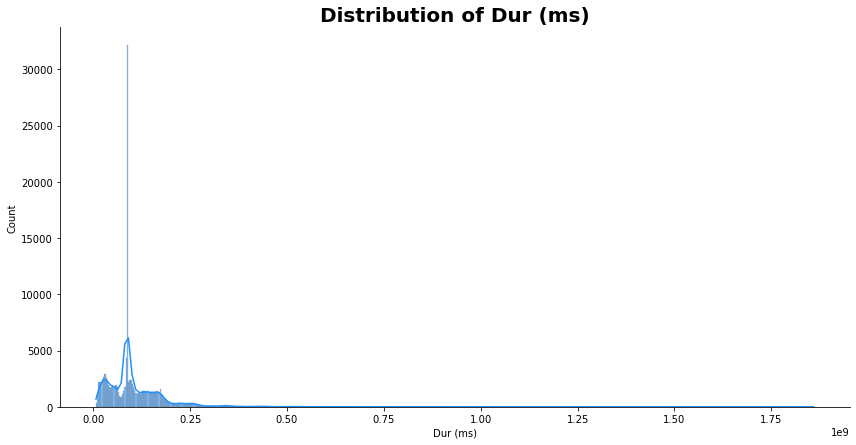

In [115]:
plot_hist(tellco_clean, 'Dur (ms)', 'dodgerblue')

### Social Media Data Volume (Bytes)

In [57]:
# important statistical measurements of center and dispersion
tellco_clean[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.468910e+05
mean,1.827740e+06
std,1.035571e+06
min,1.563000e+03
25%,9.313390e+05
50%,1.825390e+06
75%,2.727156e+06
max,3.650861e+06


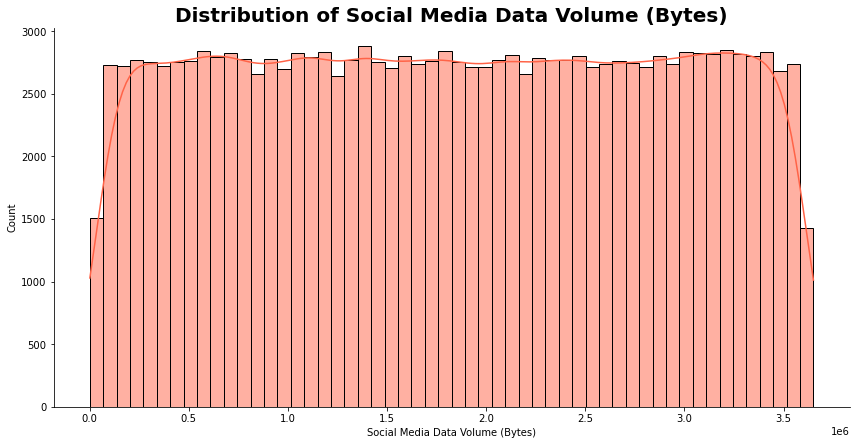

In [114]:
plot_hist(tellco_clean, 'Social Media Data Volume (Bytes)', 'tomato')

### Google Data Volume (Bytes)

In [59]:
# important statistical measurements of center and dispersion
tellco_clean[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.468910e+05
mean,7.807978e+06
std,3.517121e+06
min,4.033000e+04
25%,4.943585e+06
50%,7.815399e+06
75%,1.068314e+07
max,1.552878e+07


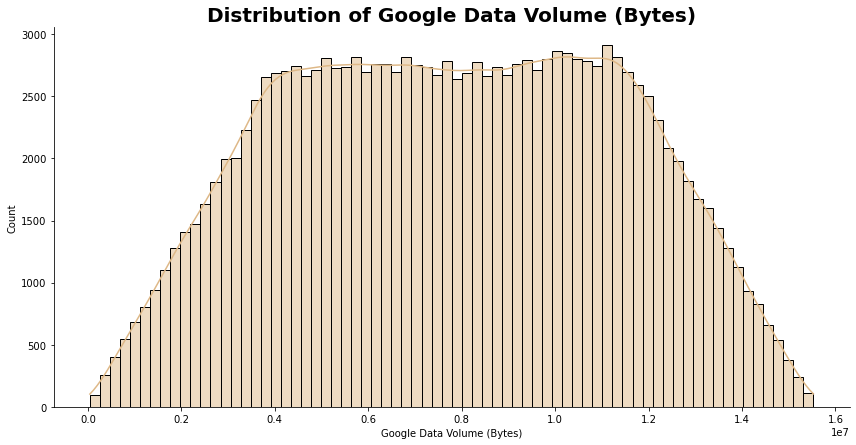

In [164]:
plot_hist(tellco_clean, 'Google Data Volume (Bytes)', 'burlywood')

### Email Data Volume (Bytes)

In [61]:
# important statistical measurements of center and dispersion
tellco_clean[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.468910e+05
mean,2.259078e+06
std,1.071128e+06
min,8.359000e+03
25%,1.359012e+06
50%,2.263843e+06
75%,3.159587e+06
max,4.518036e+06


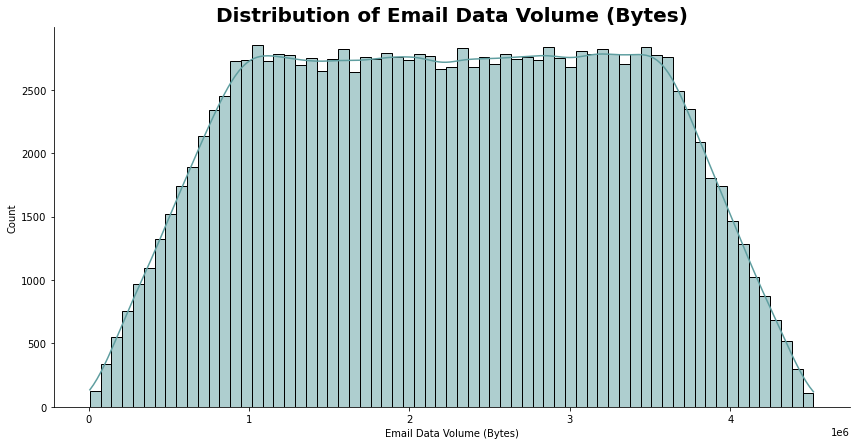

In [116]:
plot_hist(tellco_clean, 'Email Data Volume (Bytes)', 'cadetblue')

### Youtube Data Volume (Bytes)

In [63]:
# important statistical measurements of center and dispersion
tellco_clean[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.468910e+05
mean,2.264199e+07
std,9.244557e+06
min,1.296550e+05
25%,1.599734e+07
50%,2.266341e+07
75%,2.929342e+07
max,4.519008e+07


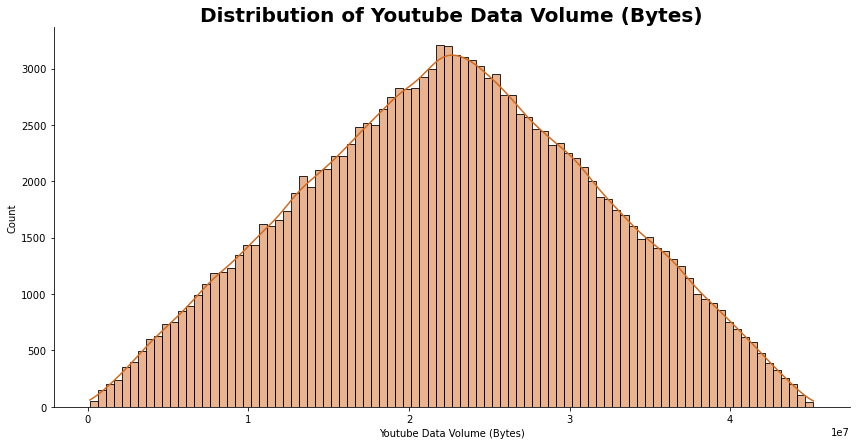

In [117]:
plot_hist(tellco_clean, 'Youtube Data Volume (Bytes)', 'chocolate')

### Netflix Data Volume (Bytes)

In [65]:
# important statistical measurements of center and dispersion
tellco_clean[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.468910e+05
mean,2.262936e+07
std,9.259223e+06
min,9.843200e+04
25%,1.598200e+07
50%,2.263459e+07
75%,2.928815e+07
max,4.519815e+07


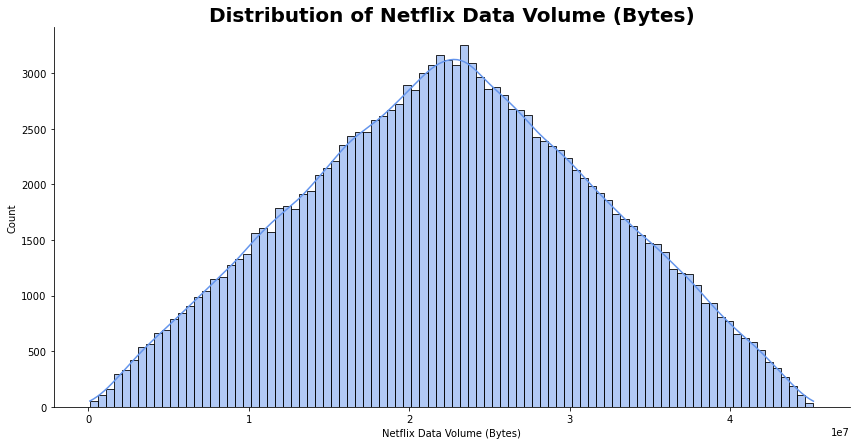

In [119]:
plot_hist(tellco_clean, 'Netflix Data Volume (Bytes)')

### Gaming Data Volume (Bytes)

In [67]:
# important statistical measurements of center and dispersion
tellco_clean[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.468910e+05
mean,4.303551e+08
std,2.440902e+08
min,3.063580e+05
25%,2.186982e+08
50%,4.316651e+08
75%,6.415728e+08
max,8.592028e+08


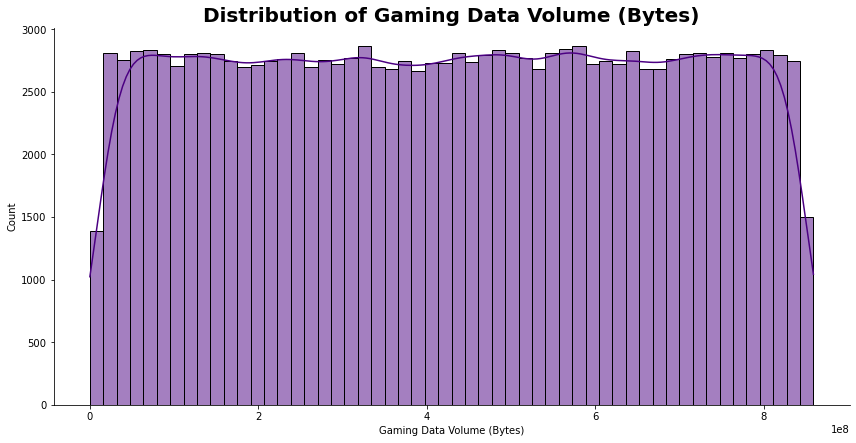

In [120]:
plot_hist(tellco_clean, 'Gaming Data Volume (Bytes)', 'indigo')

### Other Data Volume (Bytes)

In [69]:
# important statistical measurements of center and dispersion
tellco_clean[['Other Data Volume (Bytes)']].describe()

,Other Data Volume (Bytes)
count,1.468910e+05
mean,4.292667e+08
std,2.432095e+08
min,1.490450e+05
25%,2.184706e+08
50%,4.297978e+08
75%,6.396656e+08
max,8.595209e+08


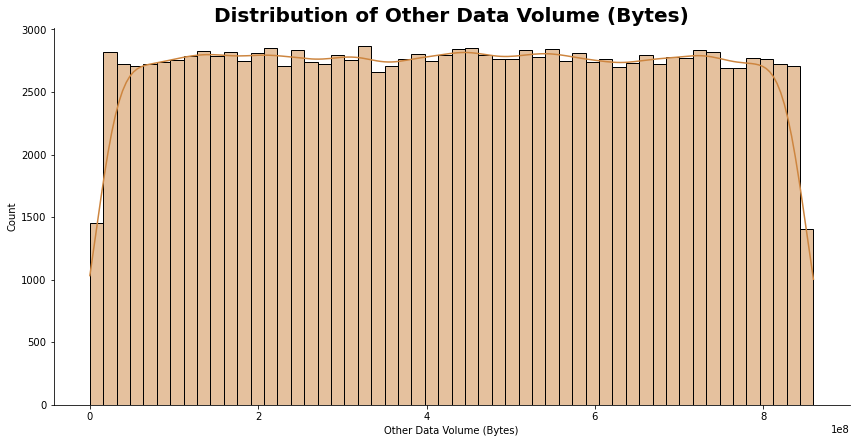

In [160]:
plot_hist(tellco_clean, 'Other Data Volume (Bytes)', 'peru')

### Total Data Volume (Bytes)

In [71]:
# important statistical measurements of center and dispersion
tellco_clean[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.468910e+05
mean,4.957842e+08
std,2.444416e+08
min,2.895611e+07
25%,2.844850e+08
50%,4.969243e+08
75%,7.066379e+08
max,9.559848e+08


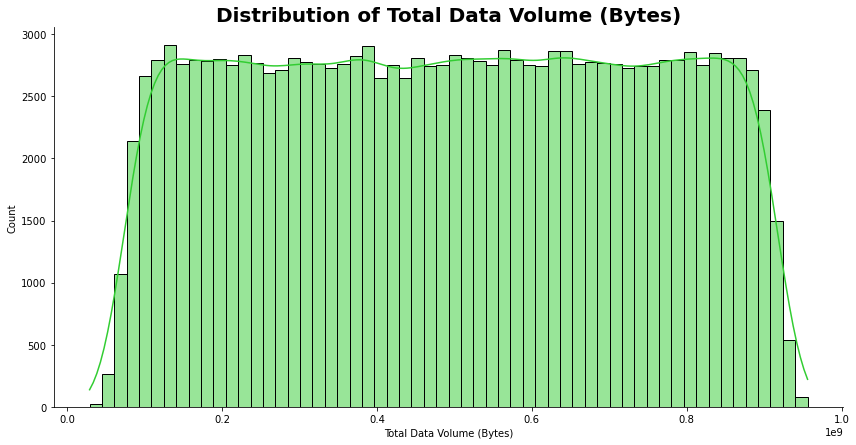

In [124]:
plot_hist(tellco_clean, 'Total Data Volume (Bytes)', 'limegreen')

## Bivariate Analysis

### Social Media Data Volume (Bytes) and Total Data Volume (Bytes)

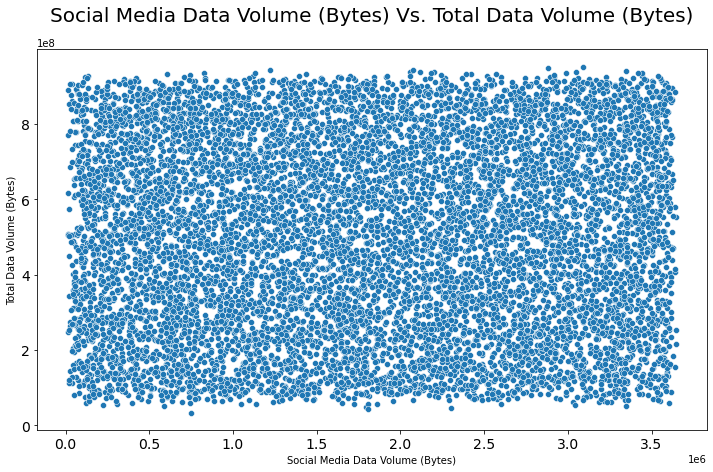

In [149]:
plot_scatter(tellco_clean.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Google Data Volume (Bytes) and Total Data Volume (Bytes)

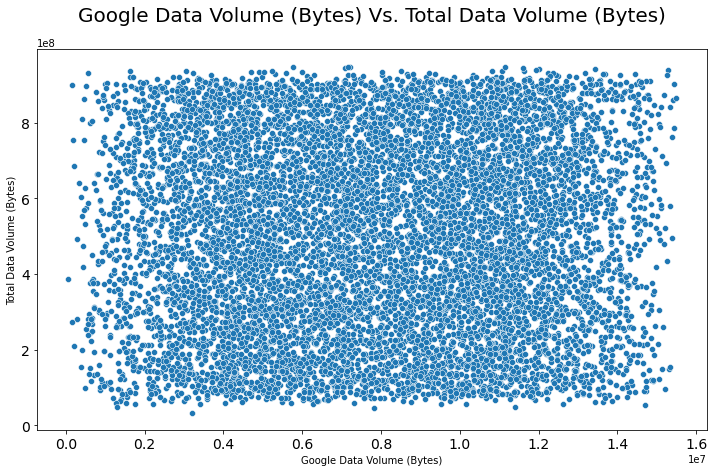

In [150]:
plot_scatter(tellco_clean.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Email Data Volume (Bytes) and Total Data Volume (Bytes)

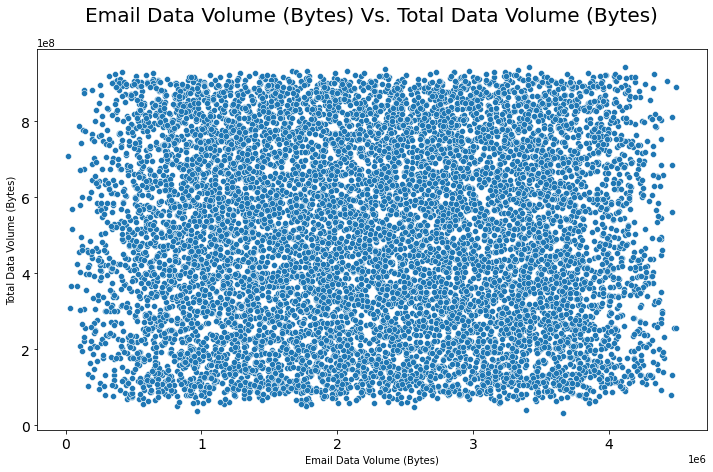

In [151]:
plot_scatter(tellco_clean.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Youtube Data Volume (Bytes) and Total Data Volume (Bytes)

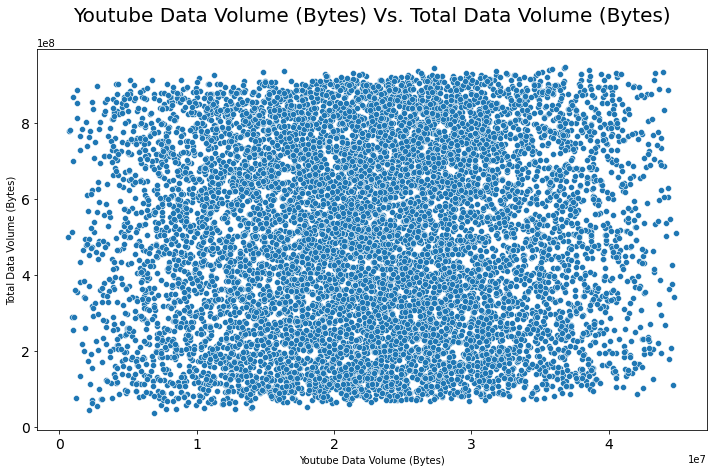

In [152]:
plot_scatter(tellco_clean.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Netflix Data Volume (Bytes) and Total Data Volume (Bytes)

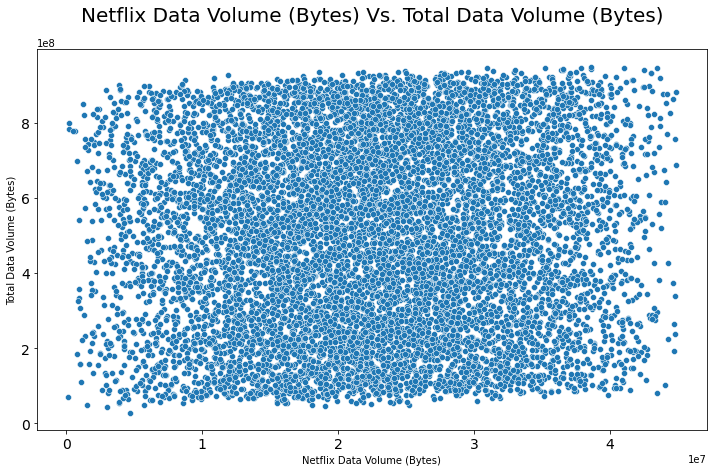

In [154]:
plot_scatter(tellco_clean.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

### Gaming Data Volume (Bytes) and Total Data Volume (Bytes)

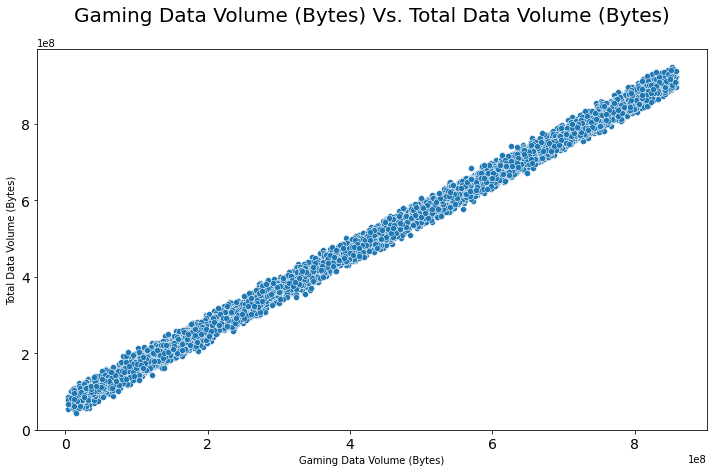

In [155]:
plot_scatter(tellco_clean.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')